In [85]:
from skimage.color import rgb2gray, rgb2lab, deltaE_cie76
import numpy as np
# import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from collections import Counter

# Kmeans cluster

(960, 1296, 3)


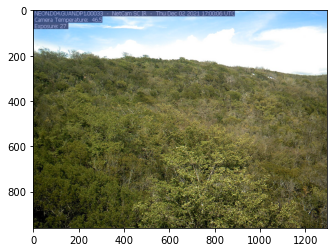

In [86]:
def readimg():
    image = plt.imread('NEON.D04.GUAN.DP1.00033.jpg')/255
    print(image.shape)
    plt.imshow(image)
    return image
pic = readimg()

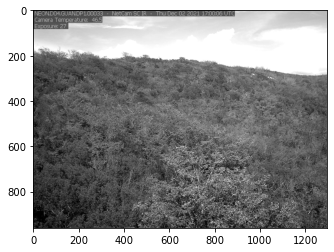

In [87]:
gray = rgb2gray(pic)
plt.imshow(gray, cmap='gray')

In [88]:
gray.shape

(960, 1296)

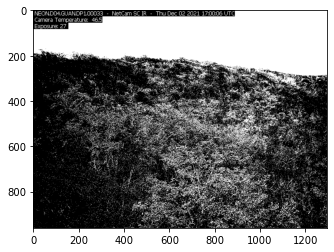

In [89]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
gray_mean = gray_r.mean()
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_mean:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

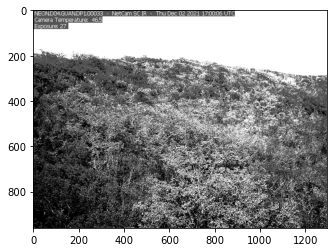

In [90]:
gray = rgb2gray(pic)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_mean:
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [91]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(1244160, 3)

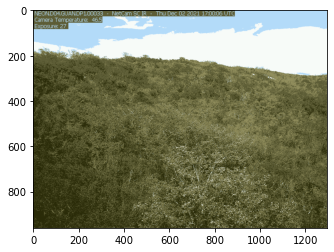

In [92]:
kmeans = KMeans(n_clusters=5, random_state=0)
fit_model = kmeans.fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [93]:
cluster_pic[400][500]

array([0.3669044 , 0.36751836, 0.21466905])

# pie chart analyze image color

In [94]:
#Color identification - RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255))

[array([0.3669044 , 0.36751836, 0.21466905]),
 array([0.70511348, 0.86166457, 0.97685524]),
 array([0.5734231 , 0.56085532, 0.36803681]),
 array([0.16746407, 0.17175823, 0.03467667]),
 array([0.96918968, 0.98501821, 0.97643357])]

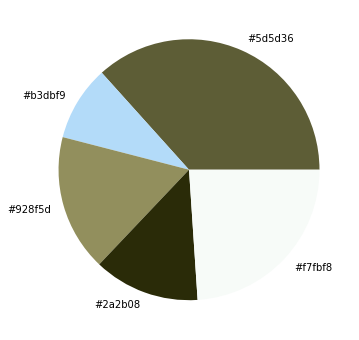

In [95]:
def countLabels(labels):
    counts = Counter(labels)
    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors
    
countLabels(fit_model.labels_)

# Making bigger window to check if it still works

In [96]:
from PIL import Image

In [97]:
old_image = Image.open("NEON.D04.GUAN.DP1.00033.jpg").convert('RGB')
# im1 = old_image.split()
# im1[0].show()
# im1[1].show()
# im1[2].show()

In [98]:
# def apply_histogram(block):
#     h, b = np.histogram(block.flatten(), 256, density = True)
#     cdf = h.cumsum()
#     cdf = 255 * cdf / cdf[-1]
#     return np.interp(block.flatten(), b[: -1], cdf).reshape(block.shape)

In [99]:
# def divide_img_band(image):
#     block_img = np.zeros(image.shape)
#     im_h, im_w = image.shape[: 2]
#     bl_h, bl_w = 2, 2

#     for row in np.arange(im_h - bl_h + 1, step = bl_h):
#         for col in np.arange(im_w - bl_w + 1, step = bl_w):
#             block_img[row: row + bl_h, col: col + bl_w] = apply_histogram(image[row: row + bl_h, col: col + bl_w])
#     return block_img



In [100]:
# converted_im1 = divide_img_band(np.asarray(im1[0]))
# # plt.imshow(converted_im1, cmap='gray')
# converted_im2 = divide_img_band(np.asarray(im1[1]))
# converted_im3 = divide_img_band(np.asarray(im1[2]))
# # converted_im4 = divide_img_band(np.asarray(im1[3]))
# r=Image.fromarray(converted_im1,mode=None).convert('L')
# g=Image.fromarray(converted_im2,mode=None).convert('L')
# b=Image.fromarray(converted_im3,mode=None).convert('L')
# new_img = Image.merge("RGB", (r, g, b))

In [101]:
# np.asarray(old_image).shape

In [102]:
def downsize_img(image):
    """
        downsize_img will traverse the pixel of the image and calculate the average
        value of a block in order to put it in the image
        
        image: an numpy array of m * n image of rgb value, dimension is m*n*3
        block_h: an integer that specifies how many pixel you want a block height to be
        block_w: an integer that specifies how many pixel you want a block width to be
    """
    im_h, im_w = image.shape[:2]
    block_h, block_w = 5, 5
    new_img = np.zeros((im_h//block_h, im_w//block_w, 3))
    for row in np.arange(im_h-block_h+1, step=block_h):
        for col in np.arange(im_w-block_w+1, step=block_w):
            new_img[row//block_h, col//block_w] = np.mean(image[row: row+block_h, col: col+block_w, :], axis = (0,1))
    return new_img

In [103]:
#Image.fromarray(divide_image(np.asarray(old_image)))
old_img = np.asarray(old_image)
new_img = downsize_img(old_img)

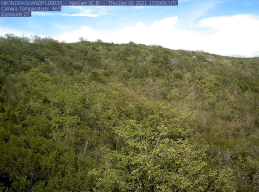

In [104]:
Image.fromarray((new_img*1).astype(np.uint8)).convert('RGB')
#Image.fromarray(new_img)

In [105]:
def split_image(image, block_h = 2, block_w = 2):
    """
        split_image will split the image to different block with
        specified height and width
        
        image: an numpy array of m * n image of rgb value, dimension is m*n*3
        block_h: an integer that specifies how many pixel you want a block height to be
        block_w: an integer that specifies how many pixel you want a block width to be
    """
    im_h, im_w = image.shape[:2]
    new_img = np.zeros((im_h//block_h, im_w//block_w, block_h, block_w, 3))
    for row in np.arange(im_h-block_h+1, step = block_h):
        for col in np.arange(im_w-block_w+1, step = block_w):
            new_img[row//block_h, col//block_w] = image[row: row+block_h, col: col+block_w, :]
    return new_img
    

In [106]:
partitioned = split_image(old_img, 150, 150)

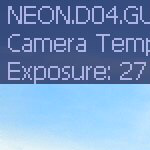

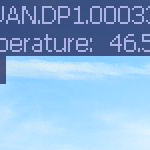

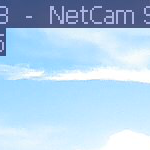

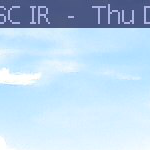

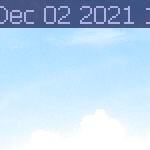

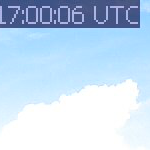

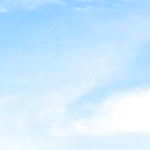

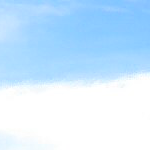

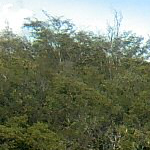

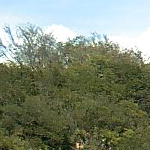

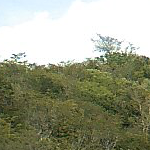

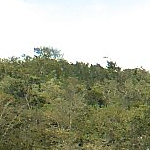

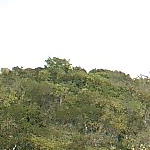

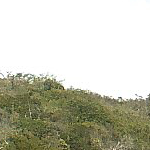

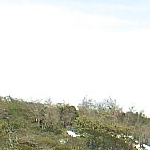

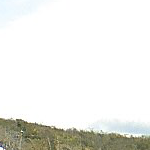

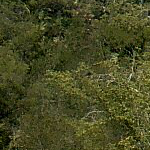

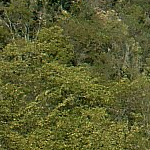

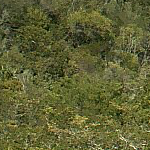

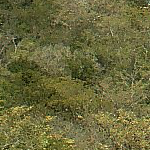

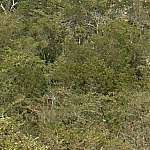

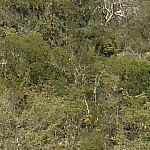

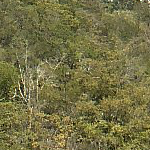

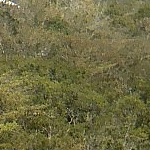

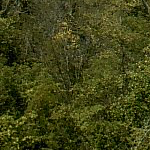

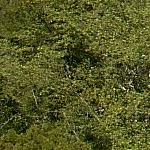

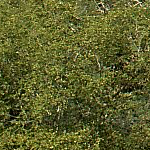

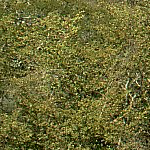

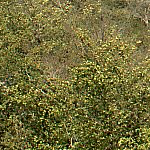

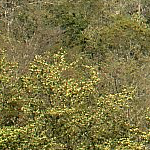

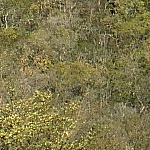

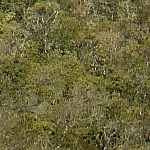

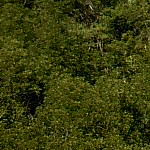

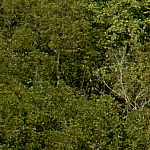

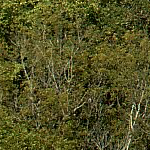

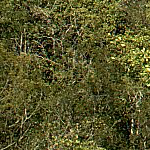

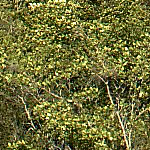

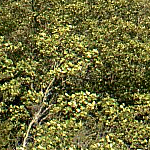

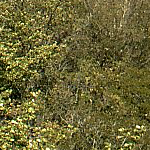

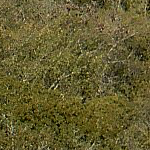

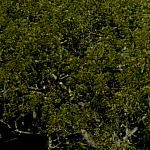

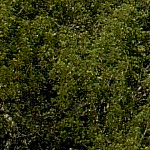

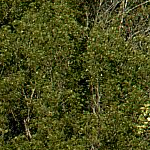

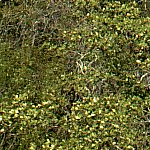

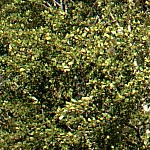

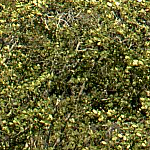

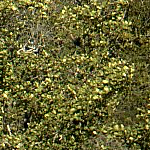

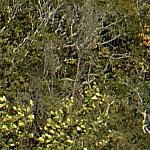

In [107]:
def print_splitted_image(splitted):
    h, w = splitted.shape[:2]
    for row in np.arange(h):
        for col in np.arange(w):
            image = Image.fromarray((splitted[row, col]*1).astype(np.uint8)).convert('RGB')
            image.show()
print_splitted_image(partitioned)

In [108]:
import cv2
def calculate_green_density(image):
    """
        calculate_green_density will calculate the density of the
        different shades of green appear in the image. THis function
        will also produce a new image that contains all the shades of
        green in the image for checking. 
        
        image, which is the numpy array representing the RGB image
    """
    h, w = image.shape[:2]

    hsv = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (36, 25, 25), (170, 255,255))
    
    green = np.zeros_like(image, np.uint8)
    imask = mask > 0
    green[imask] = image[imask]
    cv2.imwrite("green.png", green)
    
    return np.count_nonzero(mask)/(h*w)

In [109]:
calculate_green_density(old_img)

0.7129107188786008

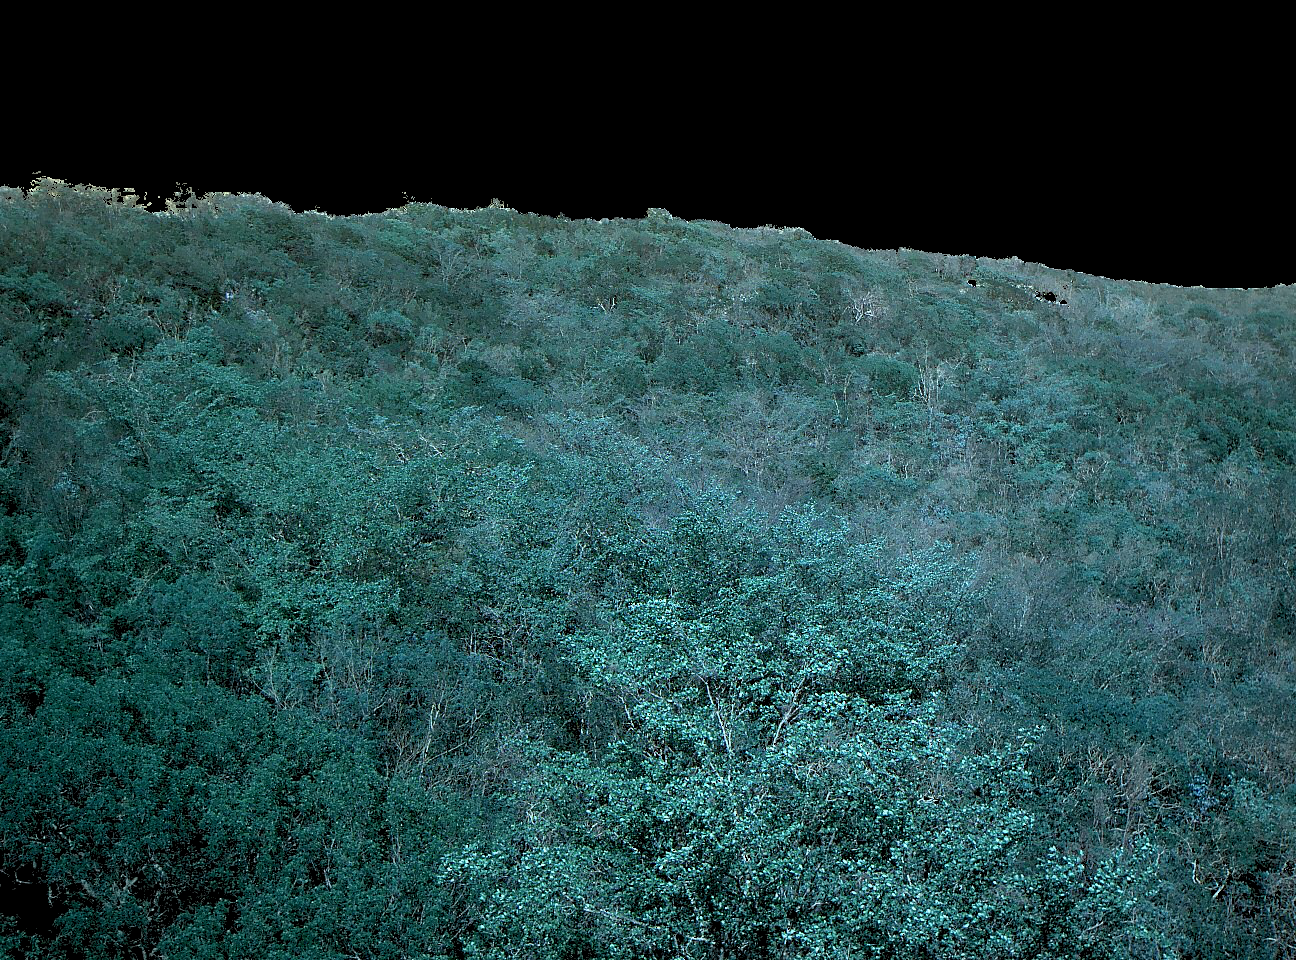

In [110]:
Image.open("green.png").show()

In [111]:
old_img.shape

(960, 1296, 3)

In [112]:
new_img.shape

(192, 259, 3)

In [113]:
calculate_green_density(new_img)

0.7510456885456885